The input are either actual training data or the outputs of neurons from the previous layer in the neural network.
The values for weights and biases are what get “trained,” and they are what make a model actually work
At the moment, we’re modeling a single neuron with three inputs. Since we’re modeling a single neuron, we only have one bias, as there’s just one bias value per neuron.

In [1]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

This neuron sums each input multiplied by that input’s weight, then adds the bias. All the neuron does is take the fractions of inputs, where these fractions (weights) are the adjustable parameters,
and adds another adjustable parameter — the bias — then outputs the result. \
![Single neuron](./img/single.png)

In [2]:
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
output

2.3

Layer of neurons \
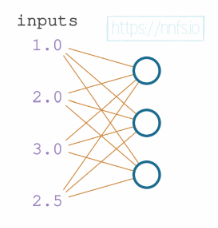

In [5]:
inputs = [1.0, 2.0, 3.0, 2.5]

weights = [
            [0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]
          ]

biases = [2, 3, 0.5]

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias    
    layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


In [6]:
# using numpy
import numpy as np

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

[4.8   1.21  2.385]


Hidden layers and batches \
Often, neural networks expect to take in many samples at a time for two reasons. One reason
is that it’s faster to train in batches in parallel processing, and the other reason is that batches
help with generalization during training. If you fit (perform a step of a training process) on one
sample at a time, you’re highly likely to keep fitting to that individual sample, rather than
slowly producing general tweaks to weights and biases that fit the entire dataset. Fitting or
training in batches gives you a higher chance of making more meaningful changes to weights
and biases. \
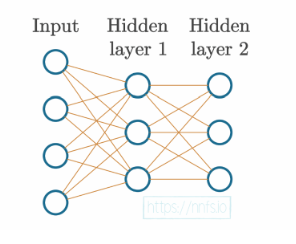

In [7]:
inputs = [[1, 2, 3, 2.5], [2., 5., -1., 2], [-1.5, 2.7, 3.3, -0.8]]
weights = [ 
            [0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


So far, we’ve only used what’s called a dense or
fully-connected layer. These layers are commonly referred to as “dense” layers in papers,
literature, and code, but you will occasionally see them called fully-connected.

In [ ]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

Activation functions 
* **Heaviside** (step function) - derivate is zero in all the domain, except for the point zero, where it is infinite (so no backpropagation). in many optimisation problems, we’d like a small change in the weight or bias to cause only a small corresponding change in the output from the network. By doing this, we can continuously tweaked the values of weights and bias towards resulting the best approximation. Having a function that can only generate either 0 or 1 (or yes and no), won't help us to achieve this objective.
* **Linear** - This activation function is usually applied to the last layer’s output in the case of a regression
model — a model that outputs a scalar value instead of a classification.
* **Sigmoid** - This function returns a value in the range of 0 for negative infinity, through 0.5 for the input of 0,
and to 1 for positive infinity. it’s usually better to have a more granular approach
for the hidden neuron activation functions. In this case, we’re getting a value that can be
reversed to its original value; the returned value contains all the information from the input,
contrary to a function like the step function, where an input of 3 will output the same value as an
input of 300,000. The output from the Sigmoid function, being in the range of 0 to 1, also works
better with neural networks
* **ReLu** - More computationally efficient to compute than Sigmoid like functions.  In practice, networks with Relu tend to show better convergence performance than sigmoid. Main problem is dying relu. Many variations exist RReLu, PReLu, ELU, SELU
* **Softmax** - distribution returned by the softmax activation function represents confidence scores for each
class and will add up to 1. The predicted class is associated with the output neuron that returned
the largest confidence score

In [ ]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

Loss functions 
* Cross entropy -> $L_{i} = -log(\hat{y_{i,k}})$
where k is correct class and i is the instance order

In [ ]:
# Common loss class
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
            range(samples),
            y_true
            ]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
            y_pred_clipped * y_true,
            axis=1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods